# Kinematic cuts of particle exchange potential

In [146]:
using Plots,Roots,LaTeXStrings;
pyplot();
default(frame=:box,size=(500,350))

In [2]:
include("./libs/constants.jl");

In [3]:
function getabc(sp,mv)
    m1,m2,m3,m4=mv
    a=sp 
    b=(sp^2-(m1^2+m2^2+m3^2+m4^2)*sp+(m1^2-m3^2)*(m2^2-m4^2))/2
    c=(m1^2-m2^2)*(m3^2-m4^2)*sp+(m1^2*m4^2-m2^2*m3^2)*(m1^2-m2^2-m3^2+m4^2)
    return [a,b,c]
end

getabc (generic function with 1 method)

In [4]:
function getdeter(sp,mv)
    a,b,c=getabc(sp,mv)
    return b^2-a*c
end

getdeter (generic function with 1 method)

In [43]:
function getx(sp,mv)
    a,b,c=getabc(sp,mv)
    return -b/a
end

getx (generic function with 1 method)

In [123]:
function gety(sq,mv)
    a,b,c=getabc(sq,mv)
    sqrt(abs(-b^2/a^2+c/a))
end

gety (generic function with 1 method)

In [5]:
function getinterval(sp,mv)
    a,b,c=getabc(sp,mv)
    return (-b-sqrt(b^2-a*c))/a,(-b+sqrt(b^2-a*c))/a
end

getinterval (generic function with 1 method)

In [6]:
function getcoefs(sp,mv)
    m1,m2,m3,m4=mv
    a,b,c=getabc(sp,mv)
    σ=m1^2+m2^2+m3^2+m4^2
    λ=(m1^2-m3^2)*(m2^2-m4^2)
    κ=(m1^2-m2^2)*(m3^2-m4^2)
    ν=(m1^2*m4^2-m2^2*m3^2)*(m1^2-m2^2-m3^2+m4^2)
    L=(λ>sp) ? σ/2-sqrt(λ) : σ/2-(sqrt(sp)+λ/sqrt(sp))/2
    return σ,λ,κ,ν,L
end

getcoefs (generic function with 1 method)

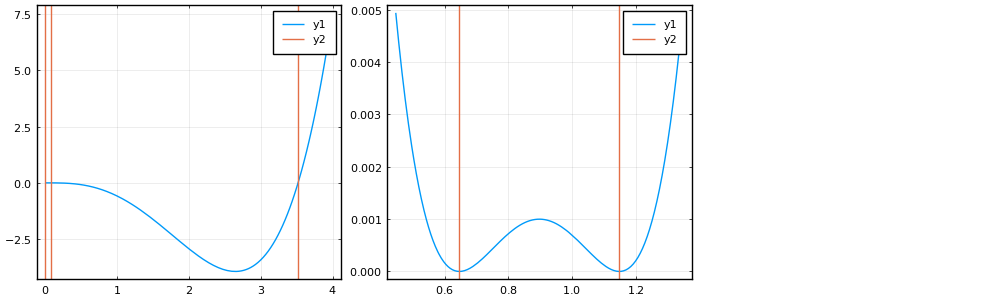

In [7]:
let 
    p1=plot(sp->getdeter(sp,[0.134,0.938,0.134,0.938]),0,4)
    vline!([(0.134-0.134)^2,(0.134+0.134)^2,(0.938+0.938)^2])
    p2=plot(sp->getdeter(sp,[0.134,0.938,0.938,0.134]),(0.134-0.938)^2-0.2,(0.134+0.938)^2+0.2)
    vline!([(0.134-0.938)^2,(0.134+0.938)^2])
    plot(p1,p2,layout=(1,3),size=(1000,300))
end

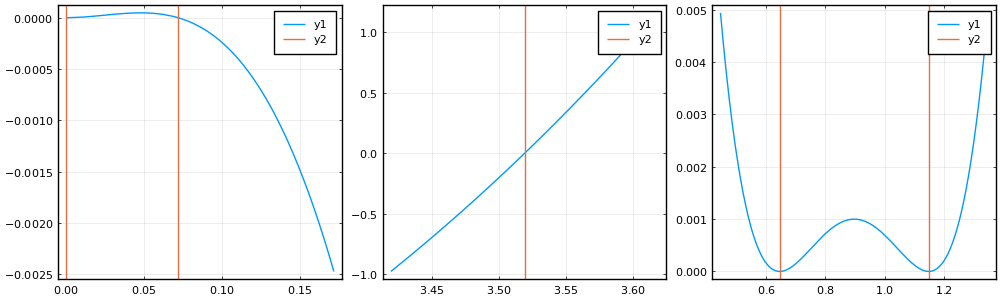

In [9]:
let 
    p1=plot(sp->getdeter(sp,[0.134,0.938,0.134,0.938]),0,(0.134+0.134)^2+0.1)
    vline!([(0.134-0.134)^2,(0.134+0.134)^2])
    p15=plot(sp->getdeter(sp,[0.134,0.938,0.134,0.938]),(0.938+0.938)^2-0.1,(0.938+0.938)^2+0.1)
    vline!([(0.938+0.938)^2])
    p2=plot(sp->getdeter(sp,[0.134,0.938,0.938,0.134]),(0.134-0.938)^2-0.2,(0.134+0.938)^2+0.2)
    vline!([(0.134-0.938)^2,(0.134+0.938)^2])
    plot(p1,p15,p2,layout=(1,3),size=(1000,300))
end

## $D^0D^{*+}\rightarrow D^0D^{*+}$

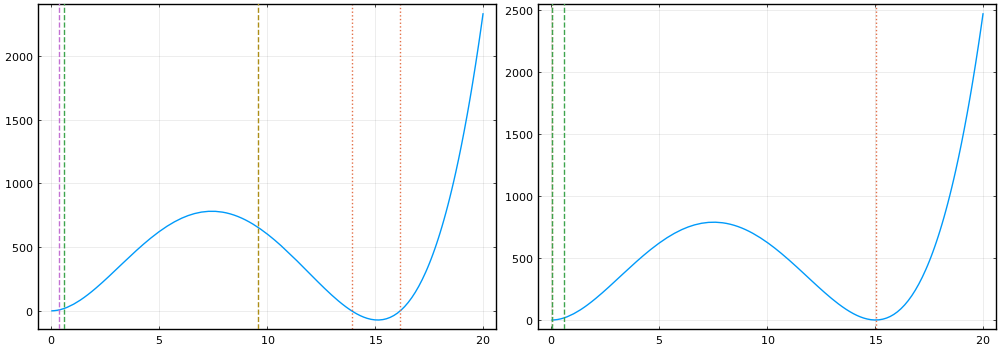

In [143]:
let 
    p1=plot(sp->getdeter(sp,[mDn,mDsc,mDn,mDsc]),0,20,legend=:false)
    vline!([(mDn+mDn)^2,(mDsc+mDsc)^2],ls=:dot) 
    vline!([mρn^2],ls=:dash)
    vline!([mσ^2],ls=:dash)
    vline!([mJψ^2],ls=:dash)
    p2=plot(sp->getdeter(sp,[mDn,mDsc,mDsc,mDn]),0,20,legend=:false)
    vline!([(mDsc-mDn)^2,(mDsc+mDn)^2],ls=:dot)
    vline!([mπc^2,mρc^2],ls=:dash)
    plot(p1,p2,layout=(1,2),size=(1000,350))
end

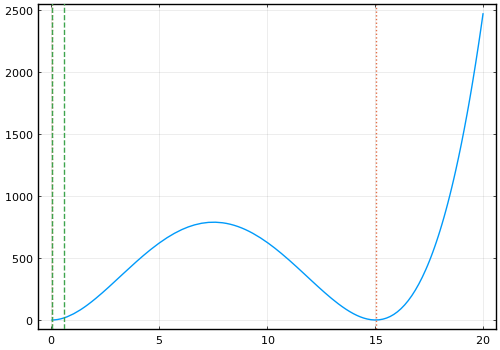

In [145]:
plot(sp->getdeter(sp,[mDn,mDsc,mDsc,mDn]),0,20,legend=:false)
    vline!([(mDsc-mDn)^2,(mDsc+mDn)^2],ls=:dot)
    vline!([mπc^2,mρc^2],ls=:dash)

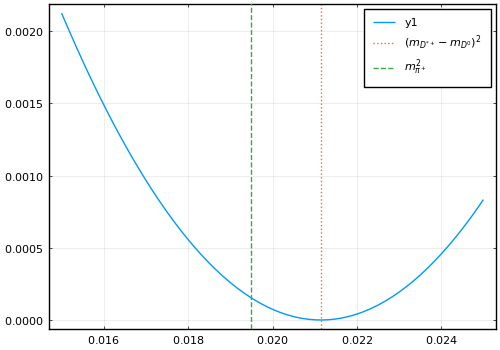

In [149]:
plot(sp->getdeter(sp,[mDn,mDsc,mDsc,mDn]),0.015,0.025)
vline!([(mDsc-mDn)^2],ls=:dot,label=L"(m_{D^{*+}}-m_{D^0})^2")
vline!([mπc^2],ls=:dash,label=L"m_{\pi^+}^2")

### t-channel

##### poles terms

In [13]:
getinterval(mρn^2,[mDn,mDsc,mDn,mDsc])|>println
getinterval(mσ^2,[mDn,mDsc,mDn,mDsc])|>println
getinterval(mJψ^2,[mDn,mDsc,mDn,mDsc])|>println

(0.022030018464062984, 14.41448890033594)
(0.021667171171428173, 14.655879815228575)
(0.05893878031738394, 5.387818596082617)


In [14]:
sqrt(14.41448890033594)|>println
sqrt(14.655879815228575)|>println

3.7966417924708065
3.828299859628106


In [152]:
sqrt.([0.05893878031738394, 5.387818596082617])

2-element Vector{Float64}:
 0.24277310460053836
 2.3211675071141715

##### off real axis

In [14]:
getcoefs((mDn+mDn)^2,[mDn,mDsc,mDn,mDsc])|>println

(15.037546986400002, 0.0, 0.31755145662443074, 0.0, 5.653933493200001)


In [15]:
sqrt(0.31755145662443074)

0.5635170420000009

##### on real axis

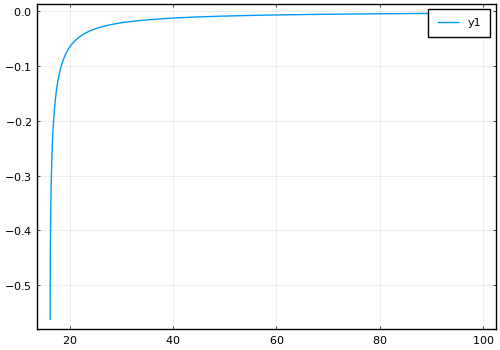

In [17]:
plot()
# plot!(sp->getinterval(sp,[mDn,mDsc,mDn,mDsc])[1],(mDsc+mDsc)^2,1e2)
plot!(sp->getinterval(sp,[mDn,mDsc,mDn,mDsc])[2],(mDsc+mDsc)^2,1e2)

### u-channel

##### pole terms

In [18]:
getinterval(mρc^2,[mDn,mDsc,mDsc,mDn])|>println
getinterval(mπc^2,[mDn,mDsc,mDsc,mDn])|>println

(0.5285516456580579, 14.436751474300003)
(15.018067092635334, 16.301498378755163)


In [19]:
sqrt(14.436751474300003)|>println

3.799572538365336


In [154]:
sqrt.([15.018067092635334, 16.301498378755163])

2-element Vector{Float64}:
 3.875315095916116
 4.037511409117647

##### real axis

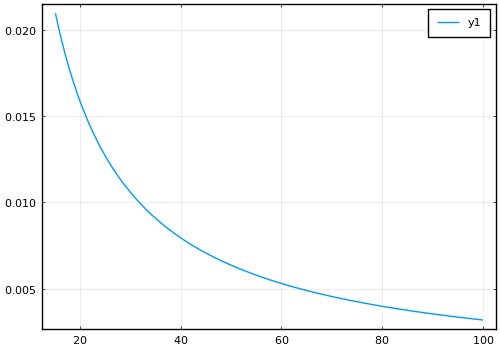

In [21]:
plot()
# plot!(sp->getinterval(sp,[mDn,mDsc,mDn,mDsc])[1],(mDn+mDsc)^2,1e2)
plot!(sp->getinterval(sp,[mDn,mDsc,mDsc,mDn])[2],(mDn+mDsc)^2,1e2)

In [22]:
getabc((mDn+mDsc)^2,[mDn,mDsc,mDsc,mDn])

3-element Vector{Float64}:
 15.016400010000002
 -0.3175514566244369
  0.006715253159025103

In [23]:
-(-0.3175514566244369)/15.016400010000002

0.02114697640000047

In [24]:
(mDsc-mDn)^2

0.02114697640000003

## $D^0D^{*+}\rightarrow D^+D^{*0}$

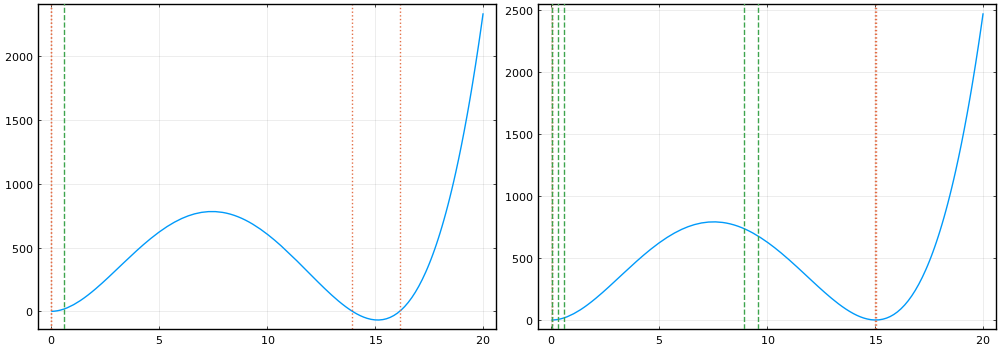

In [155]:
let 
    p1=plot(sp->getdeter(sp,[mDn,mDsc,mDc,mDsn]),0,20,legend=:false)
    vline!([(mDn-mDc)^2,(mDsc-mDsn)^2,(mDn+mDc)^2,(mDsc+mDsn)^2],ls=:dot) 
    vline!([mρc^2],ls=:dash)
    p2=plot(sp->getdeter(sp,[mDn,mDsc,mDsn,mDc]),0,20,legend=:false)
    vline!([(mDsn-mDn)^2,(mDsc-mDc)^2,(mDsn+mDn)^2,(mDsc+mDc)^2],ls=:dot)
    vline!([mπn^2,mη^2,mρn^2,mηc^2,mJψ^2],ls=:dash)
    plot(p1,p2,layout=(1,2),size=(1000,350))
end

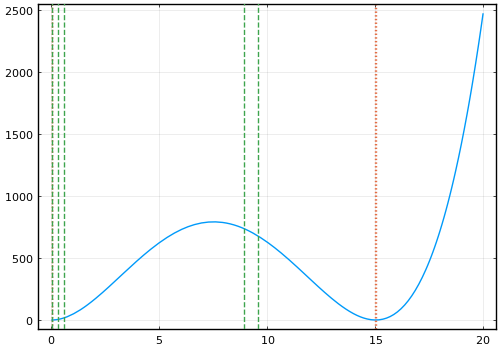

In [157]:
# plot(sp->getdeter(sp,[mDn,mDsc,mDc,mDsn]),0,20)
#     vline!([(mDn-mDc)^2,(mDsc-mDsn)^2,(mDn+mDc)^2,(mDsc+mDsn)^2],ls=:dot) 
#     vline!([mρc^2],ls=:dash,label=L"m_{\rho^+}^2")
plot(sp->getdeter(sp,[mDn,mDsc,mDsn,mDc]),0,20,legend=:false)
    vline!([(mDsn-mDn)^2,(mDsc-mDc)^2,(mDsn+mDn)^2,(mDsc+mDc)^2],ls=:dot)
    vline!([mπn^2,mη^2,mρn^2,mηc^2,mJψ^2],ls=:dash)

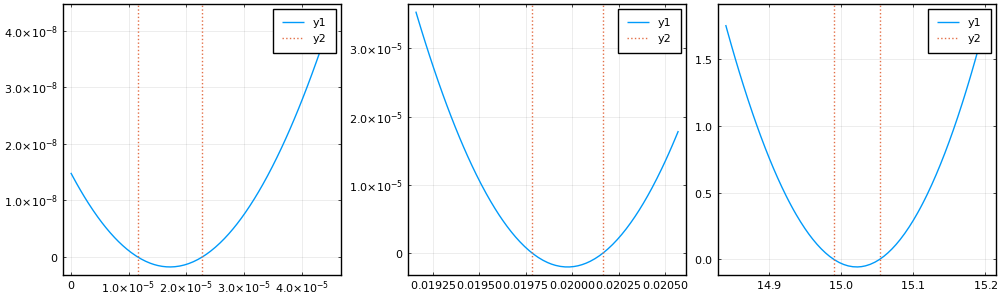

In [74]:
let 
    p1=plot(sp->getdeter(sp,[mDn,mDsc,mDc,mDsn]),0,2*(mDn-mDc)^2)
    vline!([(mDn-mDc)^2,(mDsc-mDsn)^2],ls=:dot) 
    p2=plot(sp->getdeter(sp,[mDn,mDsc,mDsn,mDc]),0.95*(mDsn-mDn)^2,1.02*(mDsn-mDn)^2)
    vline!([(mDsn-mDn)^2,(mDsc-mDc)^2],ls=:dot)
    p3=plot(sp->getdeter(sp,[mDn,mDsc,mDsn,mDc]),0.99*(mDsn+mDn)^2,1.01*(mDsc+mDc)^2)
    vline!([(mDsn+mDn)^2,(mDsc+mDc)^2],ls=:dot)
    plot(p1,p2,p3,layout=(1,3),size=(1000,300))
end

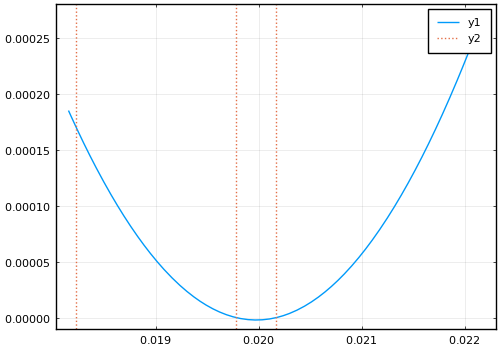

In [37]:
plot(sp->getdeter(sp,[mDn,mDsc,mDsn,mDc]),0.9*(mDsn-mDn)^2,1.1*(mDsn-mDn)^2)
vline!([(mDsn-mDn)^2,(mDsc-mDc)^2,mπn^2],ls=:dot)

### t-channels

##### poles terms

In [39]:
getinterval(mρc^2,[mDn,mDsc,mDc,mDsn])|>println

(0.021225197935100137, 14.42004740775914)


In [40]:
sqrt.([0.021225197935100137, 14.42004740775914])

2-element Vector{Float64}:
 0.145688702153256
 3.7973737513917616

##### off the real axis

In [41]:
getcoefs((mDn+mDc)^2,[mDn,mDsc,mDc,mDsn])|>println

(15.041661967800003, -0.00024401309377598617, 0.299794092655923, 0.003769551940338998, 5.653638654453065)


In [42]:
getcoefs((mDsc+mDsn)^2,[mDn,mDsc,mDc,mDsn])|>println

(15.041661967800003, -0.00024401309377598617, 0.299794092655923, 0.003769551940338998, 5.512306355621684)


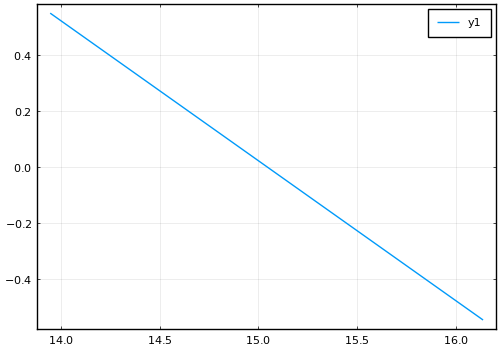

In [44]:
plot(sp->getx(sp,[mDn,mDsc,mDc,mDsn]),(mDn+mDc)^2,(mDsc+mDsn)^2)   

In [45]:
getx((mDn+mDc)^2,[mDn,mDsc,mDc,mDsn])|>println
getx((mDsc+mDsn)^2,[mDn,mDsc,mDc,mDsn])|>println

0.5477813310742852
-0.5477478315600053


0.5477633611288214


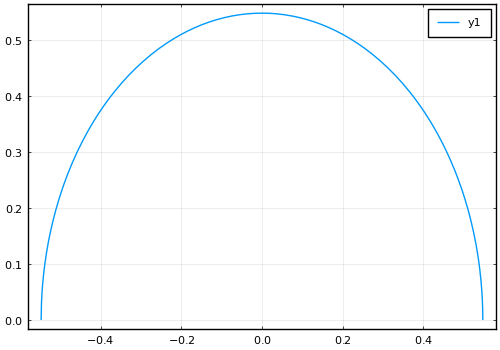

In [142]:
let
    σ,λ,κ,ν,L=getcoefs((mDn+mDc)^2,[mDn,mDsc,mDc,mDsn])
    ysq(x)=[κ-x^2+ν/(-(x-σ/2)-sqrt((x-σ/2)^2-λ)),κ-x^2+ν/(-(x-σ/2)+sqrt((x-σ/2)^2-λ))]
    xv=[getx((mDsc+mDsn)^2,[mDn,mDsc,mDc,mDsn]),getx((mDn+mDc)^2,[mDn,mDsc,mDc,mDsn])]
    plot()
#     plot!(x->ysq(x)[1],xv...)
    plot!(x->ysq(x)[2],xv...)
    
    y(x)=sqrt(abs(κ-x^2+ν/(-(x-σ/2)+sqrt((x-σ/2)^2-λ))))
    println(y(0))
    plot(y,xv...)
end

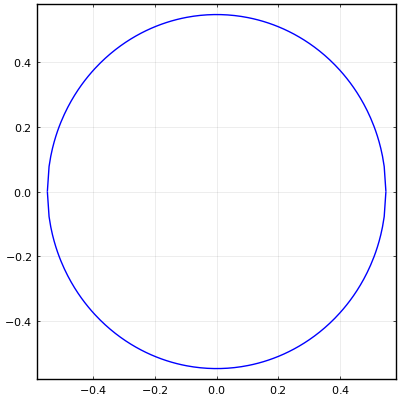

In [160]:
let 
    function getxpara(sq;mv=[mDn,mDsc,mDc,mDsn])
        a,b,c=getabc(sq,mv)
        -b/a
    end
    function getypara(sq;mv=[mDn,mDsc,mDc,mDsn])
        a,b,c=getabc(sq,mv)
        sqrt(abs(-b^2/a^2+c/a))
    end
    plot(getxpara,getypara,(mDn+mDc)^2,(mDsc+mDsn)^2,lc=:blue,legend=:false)
    plot!(getxpara,sq->-getypara(sq),(mDn+mDc)^2,(mDsc+mDsn)^2,lc=:blue,size=(400,400))
end

##### on real axis

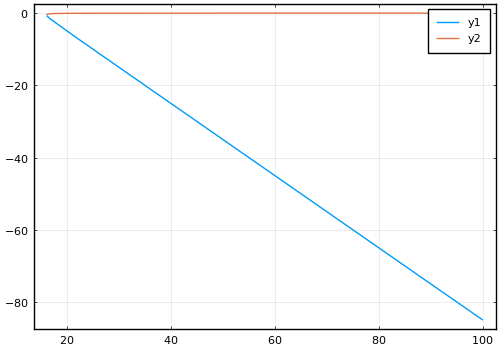

In [55]:
plot()
plot!(sp->getinterval(sp,[mDn,mDsc,mDc,mDsn])[1],(mDsc+mDsc)^2,1e2)
plot!(sp->getinterval(sp,[mDn,mDsc,mDc,mDsn])[2],(mDsc+mDsn)^2,1e2)

### u-channels

##### pole terms

In [84]:
getinterval(mη^2,[mDn,mDsc,mDsn,mDc])|>println
getinterval(mρn^2,[mDn,mDsc,mDsn,mDc])|>println
getinterval(mηc^2,[mDn,mDsc,mDsn,mDc])|>println
getinterval(mJψ^2,[mDn,mDsc,mDsn,mDc])|>println

(0.9996597817728571, 14.741467391875704)
(0.49923748378288524, 14.440604559803496)
(0.03374009097207293, 6.137960958583383)
(0.031330916675824855, 5.45082542481587)


In [85]:
sqrt.(14.741467391875704)

3.8394618622764964

In [86]:
getinterval(mπn^2,[mDn,mDsc,mDsn,mDc])|>println

(15.027390024491126, 16.464709258738758)


In [87]:
sqrt.([15.027390024491126, 16.464709258738758])

2-element Vector{Float64}:
 3.876517770434069
 4.0576728871039816

##### off-the real axis

In [88]:
getcoefs((mDn+mDsn)^2,[mDn,mDsc,mDsn,mDc])|>println

(15.041661967800003, -0.30003810574969897, -0.299794092655923, 4.513170953614046, 5.623733676219079)


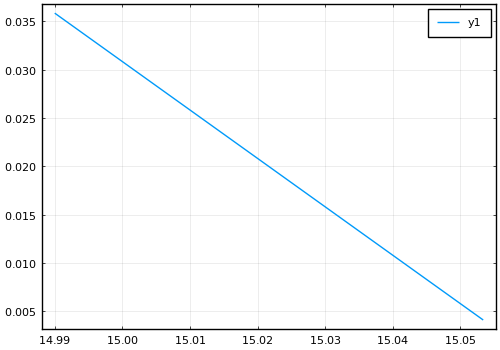

In [89]:
plot(sp->getx(sp,[mDn,mDsc,mDsn,mDc]),(mDn+mDsn)^2,(mDsc+mDc)^2)  

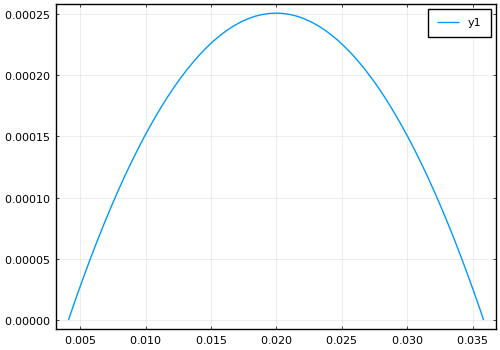

In [120]:
let
    σ,λ,κ,ν,L=getcoefs((mDn+mDsn)^2,[mDn,mDsc,mDsn,mDc])
    ysq(x)=[κ-x^2+ν/(-(x-σ/2)-sqrt((x-σ/2)^2-λ)),κ-x^2+ν/(-(x-σ/2)+sqrt((x-σ/2)^2-λ))]
    xv=[getx((mDsc+mDc)^2,[mDn,mDsc,mDsn,mDc]),getx((mDsn+mDn)^2,[mDn,mDsc,mDsn,mDc])]
    plot()
#     plot!(x->ysq(x)[1],xv...)
    plot!(x->ysq(x)[2],xv...)
end

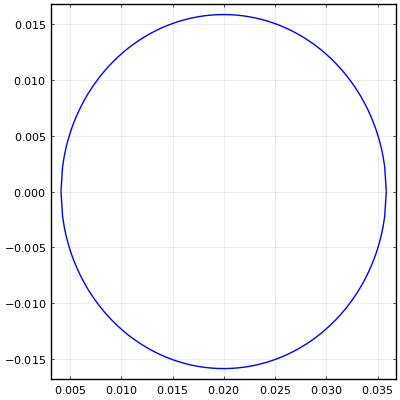

In [161]:
let 
    function getxpara(sq;mv=[mDn,mDsc,mDsn,mDc])
        a,b,c=getabc(sq,mv)
        -b/a
    end
    function getypara(sq;mv=[mDn,mDsc,mDsn,mDc])
        a,b,c=getabc(sq,mv)
        sqrt(abs(-b^2/a^2+c/a))
    end
    plot(getxpara,getypara,(mDn+mDsn)^2,(mDc+mDsc)^2,legend=:false,lc=:blue)
    plot!(getxpara,sq->-getypara(sq),(mDn+mDsn)^2,(mDc+mDsc)^2,lc=:blue,size=(400,400))
end

##### on real axis

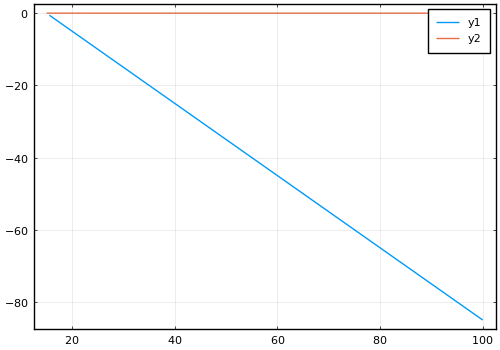

In [122]:
plot()
plot!(sp->getinterval(sp,[mDn,mDsc,mDsn,mDc])[1],(mDsc+mDc)^2,1e2)
plot!(sp->getinterval(sp,[mDn,mDsc,mDsn,mDc])[2],(mDsc+mDc)^2,1e2)

## $D^+D^{*0}\rightarrow D^+D^{*0}$

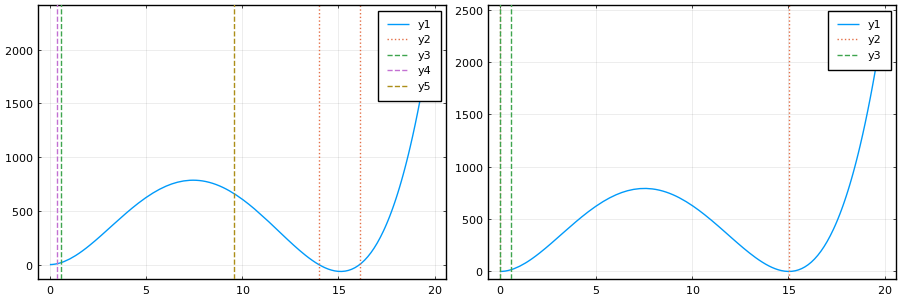

In [125]:
let 
    p1=plot(sp->getdeter(sp,[mDc,mDsn,mDc,mDsn]),0,20)
    vline!([(mDc+mDc)^2,(mDsn+mDsn)^2],ls=:dot) 
    vline!([mρn^2],ls=:dash)
    vline!([mσ^2],ls=:dash)
    vline!([mJψ^2],ls=:dash)
    p2=plot(sp->getdeter(sp,[mDc,mDsn,mDsn,mDc]),0,20)
    vline!([(mDsn-mDc)^2,(mDsn+mDc)^2],ls=:dot)
    vline!([mπc^2,mρc^2],ls=:dash)
    plot(p1,p2,layout=(1,2),size=(900,300))
end

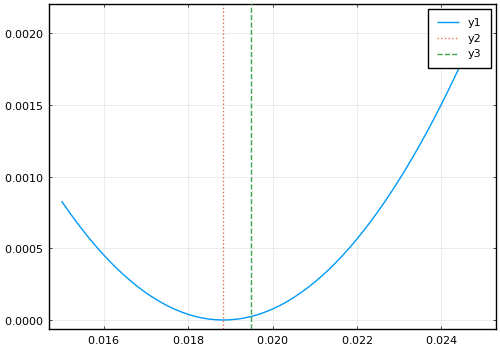

In [128]:
plot(sp->getdeter(sp,[mDc,mDsn,mDsn,mDc]),0.015,0.025)
vline!([(mDsn-mDc)^2],ls=:dot)
vline!([mπc^2],ls=:dash)

### t-channel

##### pole terms

In [129]:
getinterval(mρn^2,[mDc,mDsn,mDc,mDsn])|>println
getinterval(mσ^2,[mDc,mDsn,mDc,mDsn])|>println
getinterval(mJψ^2,[mDc,mDsn,mDc,mDsn])|>println

(0.019620602927525176, 14.425128278672473)
(0.019297727140181003, 14.666479222059822)
(0.05238768972300949, 5.402599649476988)


In [130]:
sqrt(14.666479222059822)|>println

3.829683958508825


##### off the real axis

In [131]:
getcoefs((mDc+mDc)^2,[mDc,mDsn,mDc,mDsn])|>println

(15.0457769492, 0.0, 0.2830297141344415, 0.0, 5.6532784746)


In [132]:
sqrt(0.2830297141344415)

0.5320053704000003

##### on real axis

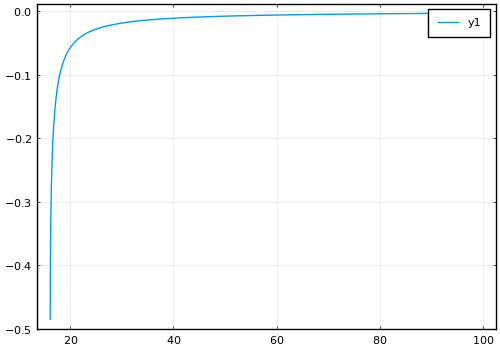

In [133]:
plot()
# plot!(sp->getinterval(sp,[mDc,mDsn,mDc,mDsn])[1],(mDsn+mDsn)^2,1e2)
plot!(sp->getinterval(sp,[mDc,mDsn,mDc,mDsn])[2],(mDsn+mDsn)^2,1e2)

### u-channels

##### pole terms

In [134]:
getinterval(mρc^2,[mDc,mDsn,mDsn,mDc])|>println
getinterval(mπc^2,[mDc,mDsn,mDsn,mDc])|>println

(0.47109159178827587, 14.444981437100003)
(14.529325341936357, 15.026297055435288)


In [135]:
sqrt(15.026297055435288)

3.876376794822104

##### on real axis

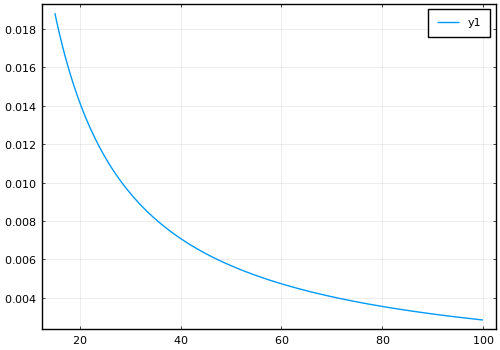

In [139]:
plot()
# plot!(sp->getinterval(sp,[mDc,mDsn,mDsn,mDc])[1],(mDc+mDsn)^2,1e2)
plot!(sp->getinterval(sp,[mDc,mDsn,mDsn,mDc])[2],(mDc+mDsn)^2,1e2)

In [140]:
getabc((mDc+mDsn)^2,[mDc,mDsn,mDsn,mDc])

3-element Vector{Float64}:
 15.026942131599998
 -0.28302971413445654
  0.005330813041100946

In [141]:
-(-0.28302971413445654)/15.026942131599998

0.018834817600001025

In [162]:
(mDsn-mDc)^2

0.018834817600000008

# Analytical continuation

## previour path way

### previous propagator

In [26]:
using Plots,QuadGK,LaTeXStrings;
import NLsolve;
pyplot(frame=:box,size=(400,300));

In [21]:
include("./libs/constants.jl");

In [22]:
λf(x, y, z) = x^2 + y^2 + z^2 - 2 * x * y - 2 * x * z - 2 * y * z
q0f(E, m1, m2, m3, m4) = abs(m3^2 - m4^2 - m1^2 + m2^2) / (2 * E)
μf(m1, m2) = m1 * m2 / (m1 + m2)
# redefine sqrt so that its cut is along the positive x axis
function xsqrt(x)
    imag(x) >=0 ? sqrt(x+0im) : -sqrt(x-0im)
end
xsqrt1(x)= (imag(x)<0&&real(x)>0) ? -xsqrt(x) : xsqrt(x)

xsqrt1 (generic function with 1 method)

In [23]:
solquad(a,b,c)=[(-b-sqrt(b^2-4*a*c))/(2a),(-b+sqrt(b^2-4*a*c))/(2a)]

solquad (generic function with 1 method)

In [24]:
function Γf(E,q,m1,m2,m3,m12)
    E1=E+m12-sqrt(m12^2+q^2+0im)-sqrt(m3^2+q^2+0im)
    μ=(m1*m2)/(m1+m2)
    return (imag(E1)<0&&real(E1)>(m1+m2)) ? -xsqrt(2*μ*(E1-m1-m2)+0im) : xsqrt(2*μ*(E1-m1-m2)+0im)
end

function Γf3(E,q,m1,m2,m3,m12)
    E1=E+m12-sqrt(m12^2+q^2+0im)-sqrt(m3^2+q^2+0im)
    μ=(m1*m2)/(m1+m2)
    return (imag(E1)<0&&real(E1)>(m1+m2)) ? -xsqrt(2*μ*(E1-m1-m2)+0im)^3 : xsqrt(2*μ*(E1-m1-m2)+0im)^3
end

function dΓf3(E,q,m1,m2,m3,m12)
    E1=E+m12-sqrt(m12^2+q^2+0im)-sqrt(m3^2+q^2+0im)
    μ=(m1*m2)/(m1+m2)
    tmp=-3*μ*xsqrt(2*μ*(E1-m1-m2)+0im)*(q/sqrt(m12^2+q^2+0im)+q/sqrt(m3^2+q^2+0im))
    return (imag(E1)<0&&real(E1)>(m1+m2)) ? -tmp : tmp
end

ΓDscf(E, p) = (ΓRDsc + g^2 * mDn / (6 * π * fπ^2 * mDsc) * Γf3(E, p, mDn, mπc, mDn,mDsc)
                                   + g^2 * mDc / (12 * π * fπ^2 * mDsc) * Γf3(E, p, mDc, mπn, mDn,mDsc))

ΓDsnf(E, p) = (ΓRDsn + g^2 * mDn / (12 * π * fπ^2 * mDsn) * Γf3(E, p, mDn, mπn, mDc,mDsn)
                                   + g^2 * mDc / (6 * π * fπ^2 * mDsn) * (Γf3(E, p, mDc, mπc, mDc,mDsn) - Γf3(mDc + mDsn, 0, mDc, mπc, mDc,mDsn)))

dΓDscf(E, p) = (g^2 * mDn / (6 * π * fπ^2 * mDsc) * dΓf3(E, p, mDn, mπc, mDn,mDsc)
                                   + g^2 * mDc / (12 * π * fπ^2 * mDsc) * dΓf3(E, p, mDc, mπn, mDn,mDsc))

dΓDsnf(E, p) = (g^2 * mDn / (12 * π * fπ^2 * mDsn) * dΓf3(E, p, mDn, mπn, mDc,mDsn)+ g^2 * mDc / (6 * π * fπ^2 * mDsn) * dΓf3(E, p, mDc, mπc, mDc,mDsn))

function find_singular(E, den; pstart = [0.01, 0.01])
    function f!(F, x)
        pr, pi = x
        tmp = den(E, pr + im * pi)
        F[1] = real(tmp)
        F[2] = imag(tmp)
    end
    sol = NLsolve.nlsolve((F, x) -> f!(F, x), pstart)
    return sol.zero[1] + im * sol.zero[2]
end
qon_c(E)=find_singular(E, (E, p) -> E-mDn-mDsc - p^2 / (2 * μf(mDn, mDsc)) + im * ΓDscf(E, p) / 2; pstart = [reim(xsqrt1(E-mDn-mDsc + im * ΓDsc / 2))...])

qon_0(E)=find_singular(E, (E, p) -> E-mDc-mDsn - p^2 / (2 * μf(mDc, mDsn)) + im * ΓDsnf(E, p) / 2; pstart = [reim(xsqrt1(E-mDc-mDsn + im * ΓDsn / 2))...])

qon_0 (generic function with 1 method)

In [27]:
xxx,www=gauss(40,0,1);
xxx3,www3=gauss(40*3,0,1);

qi=zeros(ComplexF64,2+4*length(xxx));
wi=zeros(ComplexF64,3*length(xxx));
len=length(xxx);
sublen=length(qi);

function Einner(E,q,m1,m2,m3,m12)
    return E+m12-sqrt(m12^2+q^2+0im)-sqrt(m3^2+q^2+0im)
end

function find_qint(E,m1,m2,m3,m12;rtol=1e-6)
    Etmp=E+m12-m1-m2-im*rtol
    qtmp=sqrt(λf(Etmp^2,m12^2,m3^2))/(2*Etmp)
    return imag(qtmp)>0 ? -qtmp : qtmp
end

function sol_qint3(qint1,qint2)
    a,b=reim(qint1)
    c,d=reim(qint2)
    return b*(c-a)/(b-d)+a
end

function find_qw(E,Λ=0.5;qi=qi,wi=wi,xxx=xxx,www=www,xxx3=xxx3,www3=www3,rtol=1e-6)
    
    pmax=sqrt(abs(λf(E^2,mDn^2,(mπc+mDn)^2)))/(2*E)
    
    # wi is the one wrappered with g'(x)
    qi[1],qi[2]=qon_c(E),qon_0(E)
    
    for i in eachindex(xxx)
        qi[2+i]=pmax*xxx[i]
    end
    
    if imag(E)>=0||(real(E)<=mDn+mDn+mπc)
        for i in eachindex(xxx3)
            qi[i+len+2]=Λ*xxx3[i]
            wi[i]=Λ*www3[i]
        end
        return nothing
    end
    
    # find closet DDπ
    qint1,qint2=zeros(ComplexF64,2)
    if real(E)>mDc+mDc+mπc
        qint1=find_qint(E,mDc,mπc,mDc,mDsn;rtol=rtol)
        qint2=find_qint(E,mDn,mπc,mDn,mDsc;rtol=rtol)
    elseif real(E)>mDc+mDn+mπn
        qint1=find_qint(E,mDc,mπn,mDn,mDsc;rtol=rtol)
        qint2=find_qint(E,mDn,mπc,mDn,mDsc;rtol=rtol)
    else
        qint1=find_qint(E,mDn,mπc,mDn,mDsc;rtol=rtol)
        qint2=2*real(qint1)
    end
    
    @assert real(qint1)>0&&imag(qint1)<0 "Wrong qint1 position!"
    @assert imag(qint2)>imag(qint1)&&imag(qint2)<=0&&real(qint2)>real(qint1) "Wrong qint2 position!"
    
    qint3=sol_qint3(qint1,qint2)
    for i in eachindex(xxx)
        qi[2+len+i]=qint1*xxx[i]
        qi[2+2*len+i]=qint1+(qint3-qint1)*xxx[i]
        qi[2+3*len+i]=qint3 +(Λ-qint3) *xxx[i]
        wi[i]=qint1*www[i]
        wi[i+len]=(qint3-qint1)*www[i]
        wi[i+2*len]=(Λ-qint3)*www[i]
    end
    return nothing
end

find_qw (generic function with 2 methods)

In [8]:
zzz=zeros(ComplexF64,3*length(xxx));
function getzv(a;zv=zzz)
    for i in eachindex(xxx)
        zv[i]=-1+(-im*a)*xxx[i]
        zv[i+len]=(-1-im*a)+2*xxx[i]
        zv[i+2*len]=(1-im*a)+im*a*xxx[i]
    end
    nothing
end

getzv (generic function with 1 method)

In [8]:
find_qw(mDn+mDsc-360e-6-im*24e-6;rtol=1e-6)

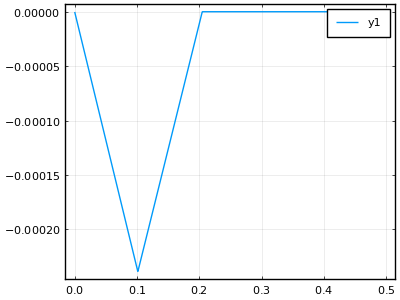

In [9]:
plot(real.(qi[3+len:end]),imag.(qi[3+len:end]))

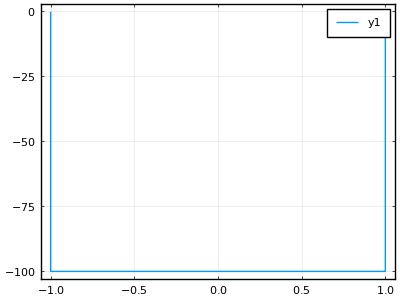

In [18]:
getzv(100)
plot(real.(zzz),imag.(zzz))

In [1]:
function p3plus(z,p1,usq)
    p1*z+sqrt(p1^2*z^2-p1^2-usq)
end
function p3minus(z,p1,usq)
    p1*z-sqrt(p1^2*z^2-p1^2-usq)
end

p3minus (generic function with 1 method)

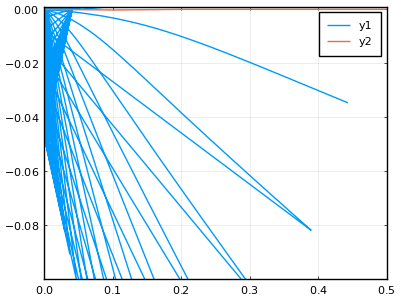

In [53]:
let E=mDn+mDsc-360e-6-im*24e-6
    p1v=qi[3+len:end]
    getzv(-10)
    resv1=vec([p3plus(z,p1,mπc^2 - q0f(E, mDn, mDsc, mDsc, mDn)^2) for p1 in p1v,z in zzz])
    resv2=vec([p3minus(z,p1,mπc^2 - q0f(E, mDn, mDsc, mDsc, mDn)^2) for p1 in p1v,z in zzz])
    resv=vcat(resv1,resv2)
    plot(real.(resv),imag.(resv),xlims=(0.0,0.5),ylims=(-0.1,0.001))
    plot!(real.(p1v),imag.(p1v))
end

### propagator of TOPT

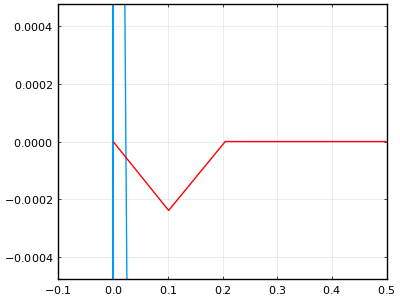

In [17]:
let E=mDn+mDsc-360e-6-im*24e-6
    getzv(100000)
    function tmpf(z,p1)
        solquad(1/(2mDn)+1/(2mπc),-p1*z/(2mπc),mDn+mDn+mπc+p1^2*(1/(2mDn)+1/(2mπc))-E)
    end
    resv1=vec([tmpf(z,p1)[1] for z in zzz,p1 in qi[3+len:end]])
    resv2=vec([tmpf(z,p1)[2] for z in zzz,p1 in qi[3+len:end]])
    resv=vcat(resv1,resv2)
    plot(real.(resv),imag.(resv),xlims=(-0.1,0.5),ylims=(2*minimum(imag.(qi[3+len:end])),-2*minimum(imag.(qi[3+len:end]))),legend=false)
    plot!(real.(qi[3+len:end]),imag.(qi[3+len:end]),lc=:red)
end

In [9]:
function zpole(p,q,mi,mj,mπ,E)
    num=p^2*(1/(2mi)+1/(2mπ))+q^2*(1/(2mj)+1/(2mπ))+mi+mj+mπ-E
    denum=p*q/mπ
    return num/denum 
end

zpole (generic function with 1 method)

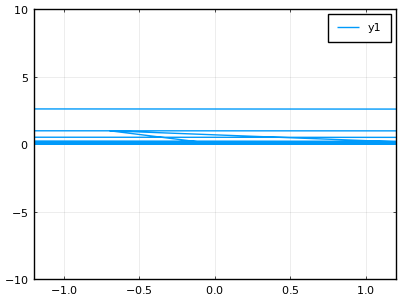

In [36]:
let E=mDn+mDsc-360e-6-im*24e-6
    find_qw(E;rtol=1e-4)
    resv=vec([zpole(p,q,mDn,mDn,mπc,E) for p in qi[3:2+len],q in qi[3:2+len]])
    plot(real.(resv),imag.(resv),xlims=(-1.2,1.2),ylims=(-10,10))
end

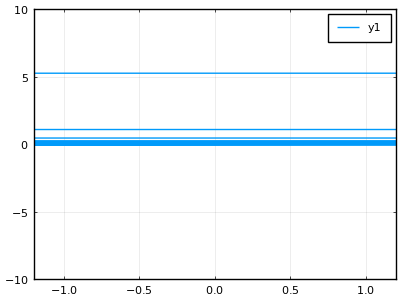

In [10]:
let E=mDn+mDsc-360e-6-im*24e-6
    find_qw(E;rtol=1e-6)
    resv=vec([zpole(p,q,mDn,mDn,mπc,E) for p in qi[3+len:end],q in qi[3+len:end]])
    plot(real.(resv),imag.(resv),xlims=(-1.2,1.2),ylims=(-10,10))
end

## path way as a_1

In [11]:
Γsmc(t,Λ,ω,V0)=t+im*V0*(1-exp(-t/ω))*(1-exp((t-Λ)/ω))

Γsmc (generic function with 1 method)

In [12]:
plotcomplex(zv;kwds...)=plot(real.(zv),imag.(zv);kwds)

plotcomplex (generic function with 1 method)

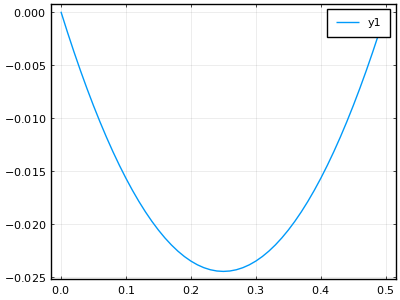

In [38]:
plotcomplex([Γsmc(t,0.5,1.0,-0.5) for t in 0.0:0.01:0.5])

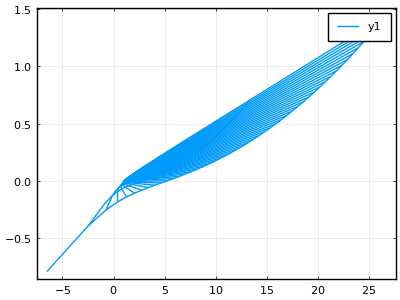

In [31]:
let E=mDn+mDsc-360e-6-im*24e-6
    k1,k2=qon_c(E),qon_0(E)
    pv=[Γsmc(t,0.5,2.0,-0.5) for t in 0.0:0.01:0.5]
#     plist=vcat(k1,k2,pv)
    plist=pv
    resv=vec([zpole(p,q,mDn,mDn,mπc,E) for p in plist,q in plist])
    plotcomplex(resv)
end

**None of the above mathods work and I decide to add discontinuity!**

## adding discontinuity

In [1]:
using Plots,LaTeXStrings;

In [31]:
include("./libs/constants.jl");
include("./libs/pwa.jl");
include("./libs/potentials.jl");

In [35]:
# ----------------------------------------------------------DD*----------------------------------------------------#
function potential_DnDsc(E, p, q; I=0, a=0.0, a1=0.0, isπ=true)
    q01, q02 = q0f(E, mDn, mDsc, mDn, mDsc), q0f(E, mDn, mDsc, mDsc, mDn)
    res = zero(ComplexF64)
    if isπ == true
        res += -4 * g^2 / fπ^2 / sqrt(16) * pwa_central(p, q, mπc^2 - q02^2) * (I - 1 / 2) * 2
    end
    return res
end

potential_DnDsc (generic function with 1 method)

In [36]:
let Ev=collect(mDn+mDsc-500e-6:10e-6:mDn+mDsc+500e-6),Γv=collect(-500e-6:10e-6:500e-6)
   function tmpf(E)
        qon=qon_c(E)
        potential_DnDsc(E,qon,qon)
    end
    resv=[tmpf(e+im*γ) for γ in Γv,e in Ev]
    plot(surface(Ev,Γv,real.(resv)))
end

In [37]:
let Ev=collect(mDn+mDsc-500e-6:10e-6:mDn+mDsc+500e-6),Γv=collect(-500e-6:10e-6:500e-6)
   function tmpf(E)
        qon=qon_c(E)
        potential_DnDsc(E,qon,qon)
    end
    resv=[tmpf(e+im*γ) for γ in Γv,e in Ev]
    plot(surface(Ev,Γv,imag.(resv)))
end

In [38]:
testfunc(z)=log(1-z)-log(-1-z)
testfunc_ac(z)=(abs(real(z))<1&&imag(z)<0) ? testfunc(z)+2π*im : testfunc(z)

testfunc_ac (generic function with 1 method)

In [39]:
let rv=collect(-2:0.1:2),iv=collect(-2:0.1:2)
    resv=[testfunc(r+im*i) for i in iv,r in rv]
    surface(rv,iv,real.(resv))
end

In [40]:
let rv=collect(-2:0.1:2),iv=collect(-2:0.1:2)
    resv=[testfunc(r+im*i) for i in iv,r in rv]
    surface(rv,iv,imag.(resv))
end

In [41]:
let rv=collect(-2:0.1:2),iv=collect(-2:0.1:2)
    resv=[testfunc_ac(r+im*i) for i in iv,r in rv]
    surface(rv,iv,real.(resv))
end

In [42]:
let rv=collect(-2:0.1:2),iv=collect(-2:0.1:2)
    resv=[testfunc_ac(r+im*i) for i in iv,r in rv]
    surface(rv,iv,imag.(resv))
end

In [46]:
function testξ(E, p, q)
    q01, q02 = q0f(E, mDn, mDsc, mDn, mDsc), q0f(E, mDn, mDsc, mDsc, mDn)
    (p^2+q^2+mπc^2 - q02^2)/(2*p*q)
end

testξ (generic function with 1 method)

In [51]:
let Ev=collect(mDn+mDsc-500e-6:10e-6:mDn+mDsc+500e-6),Γv=collect(-500e-6:10e-6:500e-6)
   function tmpf(E)
        qon=qon_c(E)
        testξ(E,qon,qon)
    end
    resv=[abs(real(tmpf(e+im*γ)))<1 ? 1 : -1 for γ in Γv,e in Ev]
    plot(surface(Ev,Γv,real.(resv)))
end

In [55]:
let Ev=collect(mDn+mDsc-500e-6:10e-6:mDn+mDsc-10e-6),Γv=collect(-500e-6:10e-6:500e-6)
   function tmpf(E)
        qon=qon_c(E)
        testξ(E,qon,qon)
    end
    resv=[abs(real(tmpf(e+im*γ)))<1 ? 1 : -1 for γ in Γv,e in Ev]
    plot(surface(Ev,Γv,real.(resv)))
end

In [53]:
let Ev=collect(mDn+mDsc-500e-6:10e-6:mDn+mDsc+500e-6),Γv=collect(-500e-6:10e-6:500e-6)
   function tmpf(E)
        qon=qon_c(E)
        testξ(E,qon,qon)
    end
    resv=[imag(tmpf(e+im*γ))>0 ? 1 : -1 for γ in Γv,e in Ev]
    plot(surface(Ev,Γv,resv))
end

## contour path as a_1

In [1]:
using Plots,LaTeXStrings;
pyplot(size=(400,300));

In [2]:
Γsmc(t,Λ,ω,V0)=t+im*V0*(1-exp(-t/ω))*(1-exp((t-Λ)/ω))

Γsmc (generic function with 1 method)

In [5]:
plotcomplex(zv;kwds...)=scatter(real.(zv),imag.(zv);kwds)

plotcomplex (generic function with 1 method)

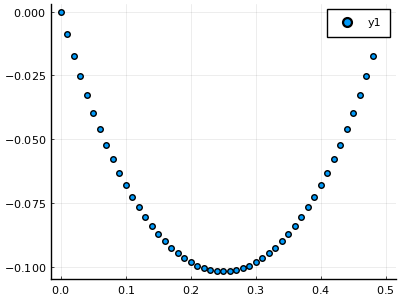

In [6]:
plotcomplex([Γsmc(t,0.5,0.2,-0.2) for t in 0.0:0.01:0.5])

In [7]:
pplus(z,l,usq)=-l*z+√(-usq+l^2*(z^2-1))
pminus(z,l,usq)=-l*z-√(-usq+l^2*(z^2-1))

pminus (generic function with 1 method)

In [8]:
zpole(p,q,usq)=(p^2+q^2+usq)/(2*p*q+10^(-50))

zpole (generic function with 1 method)

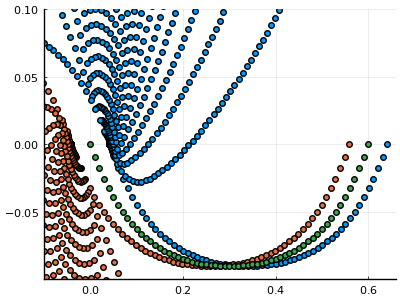

In [9]:
let lv=[Γsmc(t,0.6,0.1,-0.1) for t in 0.0:0.01:0.6],zv=collect(-1:0.1:1)
    resv1=vec([pplus(z,l,-0.0016670826352479656) for z in zv,l in lv])
    resv2=vec([pminus(z,l,-0.0016670826352479656) for z in zv,l in lv])
    scatter(real.(resv1),imag.(resv1),lc=:pink,legend=:false,xlims=(-0.1,1.1*0.6),ylims=(-0.1,0.1))
    scatter!(real.(resv2),imag.(resv2),lc=:pink)
    scatter!(real.(lv),imag.(lv),lc=:red)
end

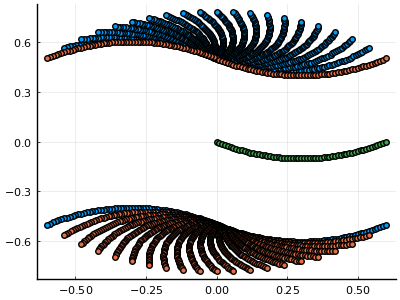

In [10]:
let lv=[Γsmc(t,0.6,0.5,-0.5) for t in 0.0:0.01:0.6],zv=collect(-1:0.1:1)
    resv1=vec([pplus(z,l,0.5^2) for z in zv,l in lv])
    resv2=vec([pminus(z,l,0.5^2) for z in zv,l in lv])
    scatter(real.(resv1),imag.(resv1),lc=:pink,legend=:false)#,xlims=(-0.1,1.1*0.6),ylims=(-0.1,0.1))
    scatter!(real.(resv2),imag.(resv2),lc=:pink)
    scatter!(real.(lv),imag.(lv),lc=:red)
end

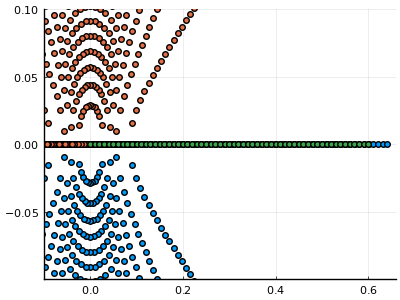

In [12]:
let lv=collect(0.0:0.01:0.6),zv=collect(-1:0.1:1)
    resv1=vec([pplus(z,l+0im,-0.0016670826352479656) for z in zv,l in lv])
    resv2=vec([pminus(z,l+0im,-0.0016670826352479656) for z in zv,l in lv])
    scatter(real.(resv1),imag.(resv1),lc=:pink,legend=:false,xlims=(-0.1,1.1*0.6),ylims=(-0.1,0.1))
    scatter!(real.(resv2),imag.(resv2),lc=:pink)
    scatter!(real.(lv),imag.(lv),lc=:red)
end

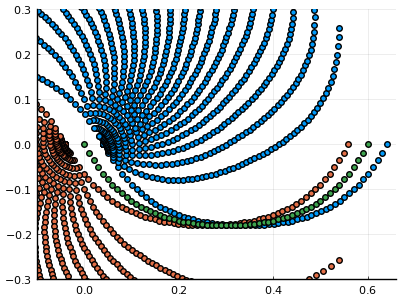

In [20]:
let V0=-0.2
    lv=[Γsmc(t,0.6,0.1,V0) for t in 0.0:0.01:0.6]
    zv=collect(-1:0.1:1)
    resv1=vec([pplus(z,l,-0.0016670826352479656) for z in zv,l in lv])
    resv2=vec([pminus(z,l,-0.0016670826352479656) for z in zv,l in lv])
    scatter(real.(resv1),imag.(resv1),lc=:pink,legend=:false,xlims=(-0.1,1.1*0.6),ylims=(1.5*V0,-1.5*V0))
    scatter!(real.(resv2),imag.(resv2),lc=:pink)
    scatter!(real.(lv),imag.(lv),lc=:red)
end

In [29]:
find_qw(mDn+mDsc-360e-6-im*24e-6,0.6)

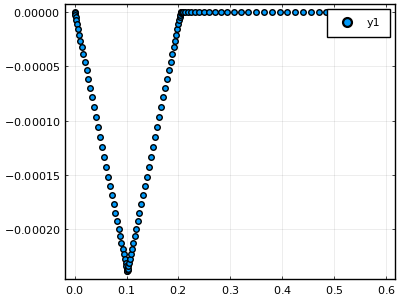

In [32]:
scatter(real.(qi[3+len:end]),imag.(qi[3+len:end]))

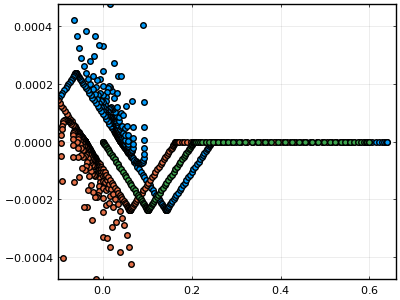

In [34]:
let lv=qi[3+len:end]
    zv=collect(-1:0.1:1)
    resv1=vec([pplus(z,l,-0.0016670826352479656) for z in zv,l in lv])
    resv2=vec([pminus(z,l,-0.0016670826352479656) for z in zv,l in lv])
    scatter(real.(resv1),imag.(resv1),lc=:pink,legend=:false,xlims=(-0.1,1.1*0.6),ylims=(2*minimum(imag.(lv)),-2*minimum(imag.(lv))))
    scatter!(real.(resv2),imag.(resv2),lc=:pink)
    scatter!(real.(lv),imag.(lv),lc=:red)
end